In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
import seaborn as sns
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
import matplotlib
from tabulate import tabulate

In [2]:
data = pd.read_csv('data/creditcard_csv.csv')
data.shape

(284807, 31)

In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [4]:
data.Class.value_counts()

'0'    284315
'1'       492
Name: Class, dtype: int64

In [5]:
data_X = data.iloc[:, 1:30]
data_y = list(map(lambda x: int(x[1][1]), enumerate(data.iloc[:, 30])))
data_X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size=0.7)
X_train.shape, X_test.shape

((199364, 29), (85443, 29))

In [7]:
def evaluate_model(fraud_detection_model, X_train, X_test, y_train, y_test):
    y_train_pred = list(fraud_detection_model.predict(X_train))
    y_test_pred = list(fraud_detection_model.predict(X_test))

    train_accuracy = fraud_detection_model.score(X_train, y_train)
    print('Model Accuracy on train set: {s1}'.format(s1=train_accuracy))
    test_accuracy = fraud_detection_model.score(X_test, y_test)
    print('Model Accuracy on test set: {s1}'.format(s1=test_accuracy))
    print('######################################################################')

    f1_score_val = round(f1_score(y_test, y_test_pred), 2)
    recall_score_val = round(recall_score(y_test, y_test_pred), 2)
    precision_score_val = round(precision_score(y_test, y_test_pred), 2)
    print('Model F1 score on test set: {s1}'.format(s1=f1_score_val))
    print('Model recall score on test set: {s1}'.format(s1=recall_score_val))
    print('Model precision score on test set: {s1}'.format(s1=precision_score_val))
    print('######################################################################')

    cm = confusion_matrix(y_test, y_test_pred)
    (tn, fp, fn, tp) = cm.ravel()

    print('Confusion Matrix Data for Test Set:')
    print('true negative: {tn_i}'.format(tn_i=tn))
    print('false positive: {fp_i}'.format(fp_i=fp))
    print('false negative: {fn_i}'.format(fn_i=fn))
    print('true positive: {tp_i}'.format(tp_i=tp))
    MCC = ((tp*tn+fp*fn)/(np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))))
    print('MCC: {l1}'.format(l1=MCC))
    classes = ['Normal', 'Fraud']
    df = pd.DataFrame(cm, columns=classes, index=classes)
    plt.figure(figsize=(3, 3))
    sns.heatmap(df, annot=True, cmap="icefire", norm=matplotlib.colors.LogNorm())
    plt.title('Confusion Matrix for Test Data')
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    
    X_train_2d, X_test_2d = reduce_dimension(X_train, X_test)
    plot_2d(X_test_2d, y_test, y_test_pred)  

    return [f1_score_val, recall_score_val, precision_score_val, MCC, tn, fp, fn, tp]

In [8]:
def reduce_dimension(X_train, X_test):
    pca_model = PCA(n_components=2)
    pca_model.fit(X_train)

    X_train_2d = pca_model.fit_transform(X_train)
    X_test_2d = pca_model.fit_transform(X_test)

    return X_train_2d, X_test_2d

In [9]:
# Visualize data in 2 dimension
def plot_2d(X, y, y_pred):
    plt.subplot(1, 2, 1)
    ax = plt.gca()
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.scatter([X[i][0] for i in range(len(y)) if y[i]==0], [X[i][1] for i in range(len(y)) if y[i]==0], label="Normal", c='g', s=5)
    plt.scatter([X[i][0] for i in range(len(y)) if y[i]==1], [X[i][1] for i in range(len(y)) if y[i]==1], label="Actual Fraud", c='k', s=5)
    plt.legend()

    plt.subplot(1, 2, 2)
    ax = plt.gca()
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.scatter([X[i][0] for i in range(len(y_pred)) if y_pred[i]==0], [X[i][1] for i in range(len(y_pred)) if y_pred[i]==0], label="Normal", c='g', s=5)
    plt.scatter([X[i][0] for i in range(len(y_pred)) if y_pred[i]==1], [X[i][1] for i in range(len(y_pred)) if y_pred[i]==1], label="Predicted Fraud", c='r', s=5)
    plt.legend()

    return plt.show()

In [10]:
all_results = []
all_results.append(['method', 'f1_score_val', 'recall_score_val', 'precision_score_val', 'MCC', 'tn', 'fp', 'fn', 'tp'])

In [11]:
n = None
print('Train set size: {l1}'.format(l1=len(X_train)))
print('Test set size: {l1}'.format(l1=len(X_test)))
print('######################################################################')
print('Train set classes size:\n{l1}'.format(l1=pd.DataFrame(y_train).value_counts()))
print('Test set classes size:\n{l1}'.format(l1=pd.DataFrame(y_test).value_counts()))
print('######################################################################')

Train set size: 199364
Test set size: 85443
######################################################################
Train set classes size:
0    199003
1       361
dtype: int64
Test set classes size:
0    85312
1      131
dtype: int64
######################################################################


Logistic Regression
Model Accuracy on train set: 0.999132240524869
Model Accuracy on test set: 0.9993914071369217
######################################################################
Model F1 score on test set: 0.77
Model recall score on test set: 0.67
Model precision score on test set: 0.91
######################################################################
Confusion Matrix Data for Test Set:
true negative: 85303
false positive: 9
false negative: 43
true positive: 88
MCC: 0.7804609962344948


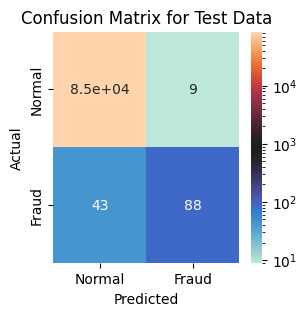

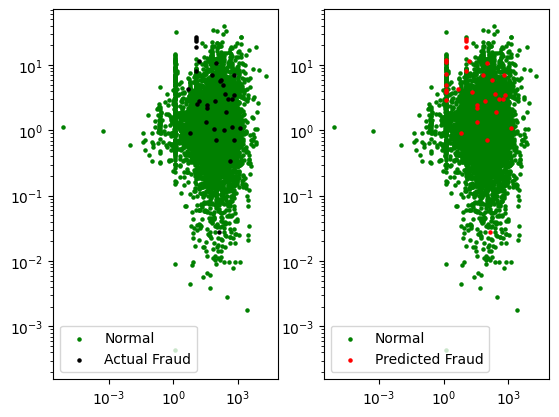

In [12]:
print('======================================================================')
print('Logistic Regression')
print('======================================================================')
fraud_detection_model = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train)
r = evaluate_model(fraud_detection_model, X_train, X_test, y_train, y_test)
r.insert(0, 'LR' + ('' if n is None else '_'+str(n)))
all_results.append(r)

Random Forest Classifier
Model Accuracy on train set: 1.0
Model Accuracy on test set: 0.9996254813150287
######################################################################
Model F1 score on test set: 0.87
Model recall score on test set: 0.79
Model precision score on test set: 0.95
######################################################################
Confusion Matrix Data for Test Set:
true negative: 85307
false positive: 5
false negative: 27
true positive: 104
MCC: 0.8701810207609508


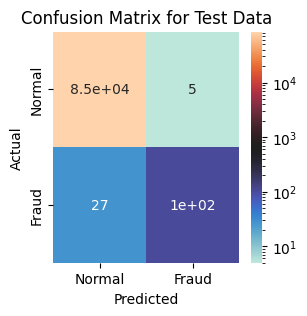

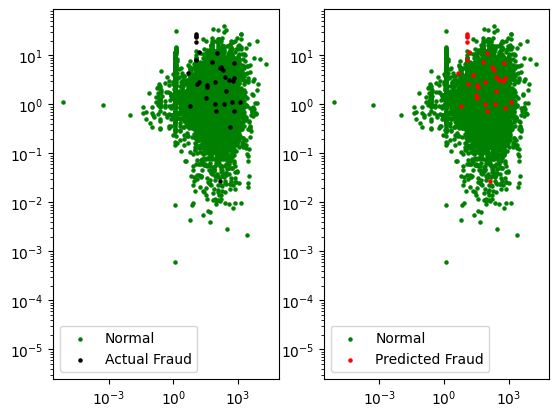

In [13]:
print('======================================================================')
print('Random Forest Classifier')
print('======================================================================')
fraud_detection_model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
r = evaluate_model(fraud_detection_model, X_train, X_test, y_train, y_test)
r.insert(0, 'RF' + ('' if n is None else '_'+str(n)))
all_results.append(r)

In [14]:
def oversampling(X, y):
    X_resampled, y_resampled = SMOTETomek(random_state=42).fit_resample(X, y)
    return X_resampled, y_resampled

In [15]:
X_train_resampled, y_train_resampled = oversampling(X_train, y_train)
n = 'OverSampled'
print('OverSampled Train set size: {l1}'.format(l1=len(X_train_resampled)))
print('OverSampled Train set classes size:\n{l1}'.format(l1=pd.DataFrame(y_train_resampled).value_counts()))

OverSampled Train set size: 398006
OverSampled Train set classes size:
0    199003
1    199003
dtype: int64


OverSampled - Logistic Regression
Model Accuracy on train set: 0.9594227222705185
Model Accuracy on test set: 0.9822571772994863
######################################################################
Model F1 score on test set: 0.14
Model recall score on test set: 0.91
Model precision score on test set: 0.07
######################################################################
Confusion Matrix Data for Test Set:
true negative: 83808
false positive: 1504
false negative: 12
true positive: 119
MCC: 0.25623818822193556


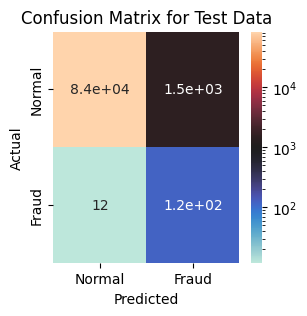

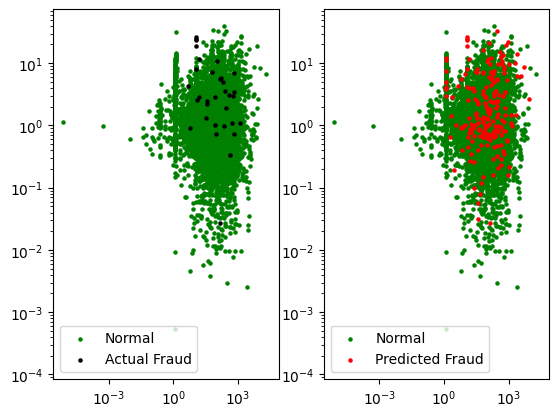

In [16]:
print('======================================================================')
print('OverSampled - Logistic Regression')
print('======================================================================')
fraud_detection_model = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train_resampled, y_train_resampled)
r = evaluate_model(fraud_detection_model, X_train_resampled, X_test, y_train_resampled, y_test)
r.insert(0, 'LR' + ('' if n is None else '_'+str(n)))
all_results.append(r)

OverSampled - Random Forest Classifier
Model Accuracy on train set: 0.9084159535283388
Model Accuracy on test set: 0.9996488887328394
######################################################################
Model F1 score on test set: 0.88
Model recall score on test set: 0.81
Model precision score on test set: 0.95
######################################################################
Confusion Matrix Data for Test Set:
true negative: 85307
false positive: 5
false negative: 25
true positive: 106
MCC: 0.8788977988255051


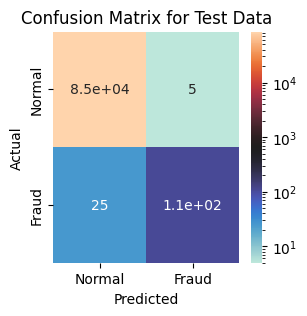

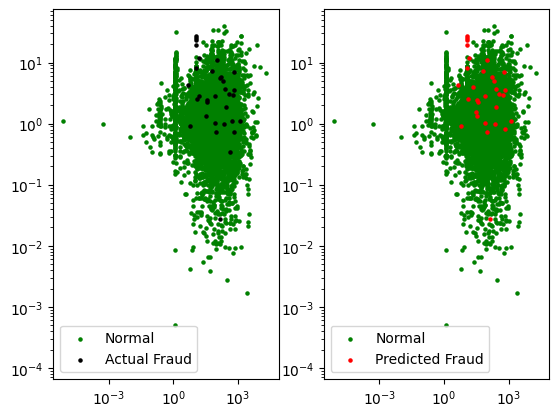

In [17]:
print('======================================================================')
print('OverSampled - Random Forest Classifier')
print('======================================================================')
fraud_detection_model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
r = evaluate_model(fraud_detection_model, X_train_resampled, X_test, y_train_resampled, y_test)
r.insert(0, 'RF' + ('' if n is None else '_'+str(n)))
all_results.append(r)

In [18]:
print(tabulate(all_results))

--------------  ------------  ----------------  -------------------  -------------------  -----  ----  --  ---
method          f1_score_val  recall_score_val  precision_score_val  MCC                  tn     fp    fn  tp
LR              0.77          0.67              0.91                 0.7804609962344948   85303  9     43  88
RF              0.87          0.79              0.95                 0.8701810207609508   85307  5     27  104
LR_OverSampled  0.14          0.91              0.07                 0.25623818822193556  83808  1504  12  119
RF_OverSampled  0.88          0.81              0.95                 0.8788977988255051   85307  5     25  106
--------------  ------------  ----------------  -------------------  -------------------  -----  ----  --  ---
